## Adaptive linear neurons and the convergence of learning

#### The Adaline algorithm is particularly interesting because it illustrates the key concepts of defining and minimizing continuous cost functions

#### The key difference between the Adaline rule and  perceptron is that the weights are updated based on a linear activation function rather than a unit step function like in the perceptron.

### Some Other difference between Perceptron and Adalines are 
### **Activation Function**
#### **Perceptron:** The activation function used in the perceptron algorithm is a step function. It produces a binary output of 0 or 1 based on a threshold.

#### **Adaline:** The activation function used in the Adaline algorithm is a linear activation function. It produces a continuous-valued output based on the weighted sum of the input features.

### **Weight update rule:**

#### **Perceptron:** The perceptron algorithm uses a simple weight update rule that only considers whether the predicted output is correct or not. If the prediction is incorrect, the weights are adjusted based on the input and a learning rate.
#### **Adaline:** The Adaline algorithm uses a more sophisticated weight update rule based on the continuous-valued output and the true class labels. It calculates the error as the difference between the true output and the continuous output. The weights are updated proportionally to this error and the input, considering the learning rate.

### **Convergence and learning capability:**

#### **Perceptron:** The perceptron algorithm can only converge and learn to classify linearly separable patterns. It means that if the data can be divided into two groups by a straight line or hyperplane, the perceptron can learn to classify them correctly. However, it may not converge if the data is not linearly separable.
#### **Adaline:** The Adaline algorithm has a more flexible learning capability. It can learn to approximate any linear function, regardless of whether the data is linearly separable or not. It can also converge even if the data is not linearly separable. This is because the Adaline algorithm aims to minimize the continuous-valued error, rather than finding a perfect boundary.

![adaline](./adaline.png)

## Minimizing cost functions with gradient descent

#### One of the key ingredients of supervised machine learning algorithms is a defined objective function that  is to be optimized during the learning process. In case of Adaline the cost function is $J(w)=\frac{1}{2}\sum \limits_i(y^i-\phi(z^i))^2$

#### The main advantage of this continuous linear activation function, in contrast to the unit step function, is that the cost function becomes differentiable. We can describe the main idea behind gradient descent as **climbing down a hill** until a local or global cost minimum is reached. In each iteration, we take a step in the opposite direction of the gradient, where the step size is determined by the value of the learning rate, as well as the slope of the gradient
#### **Gradient Descent** is also called steepest descent. The idea behind the algorithm is to find an efficient way of reaching the minimum value of a function.
![gradent](./gradient.png)

#### we can now update the weights by taking a step in theopposite direction of the gradient, ∇J(𝐰), of our cost function, J(𝐰):

### $w:=w+\Delta w$

### $\Delta w =-\eta \nabla J(w)$

#### To compute the gradient of the cost function, we need to compute the partial derivative of the cost function with respect to each weight:


### $\frac{\partial J}{\partial w_j}=\frac{\partial}{\partial w_j}\frac{1}{2}\sum\limits_i(y^i-\phi(z^i))^2\\=\frac{1}{2}\frac{\partial}{\partial w_j}\sum\limits_i(y^i-\phi(z^i))^2\\=\frac{1}{2}\sum\limits_i 2(y^i-\phi(z^i))\frac{\partial}{\partial w_j}(y^i-\sum\limits_i(w_j^ix_j^i))\\=\sum\limits_i (y^i-\phi(z^i))-*\sum\limits_i(x_j^i)$
### $\frac{\partial J}{\partial w_j}=-\sum\limits_i(y^i-\phi(z^i))x_j^i$


#### The weight update is calculated based on all examples in the training dataset , instead of updating the weights incremently after each training example that's why it is referred to as batch gradient descent.

In [31]:
from IPython.display import YouTubeVideo

video=YouTubeVideo("sDv4f4s2SB8")


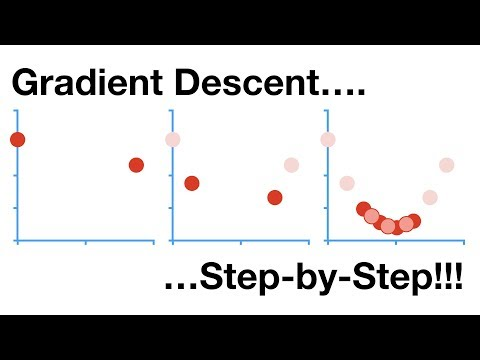

In [32]:
display(video)

## Implementing Adaline in Python

In [6]:
import numpy as np

In [40]:
class Adaline(object):


    def __init__(self,eta=0.01,n_iter=50,random_satate=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_satate
    
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=.01,size=1+X.shape[1])
        print(X.shape[1])
        self.cost_=[]

        for i in range(self.n_iter):

            net_input=self.net_intput(X)
            output=self.activation(net_input)
            print('net_input {}'.format(net_input))
            errors=y-output
            print('eror {}'.format(errors))

            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            cost=(errors**2).sum()/2
            self.cost_.append(cost)
        return self
    


    def net_intput(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_intput(X))>=0.0,1,-1)

In [8]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')

In [9]:
df=pd.read_csv(s,header=None,
encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
import matplotlib.pyplot as plt

y=df.iloc[0:100,4].values


In [11]:
y = np.where(y == 'Iris-setosa', -1, 1)


In [12]:
X=df.iloc[0:100,[0,2]].values


2
net_input [-0.02235053 -0.02112702 -0.01937533 -0.01981992 -0.02173877 -0.02577031
 -0.01929175 -0.02226694 -0.01806823 -0.02165519 -0.02471397 -0.0215716
 -0.02051526 -0.01587196 -0.02557648 -0.02654924 -0.02365763 -0.02235053
 -0.02760558 -0.0228787  -0.02577031 -0.0228787  -0.01717906 -0.02393504
 -0.02315612 -0.02279512 -0.02279512 -0.02349046 -0.02296228 -0.02095985
 -0.0215716  -0.02471397 -0.02349046 -0.02479755 -0.02165519 -0.02068243
 -0.02426938 -0.02165519 -0.01754006 -0.0228787  -0.0212106  -0.01815182
 -0.01754006 -0.02279512 -0.02499139 -0.02051526 -0.02340687 -0.01929175
 -0.02410221 -0.02173877 -0.05140357 -0.04667669 -0.05184815 -0.03853002
 -0.04781661 -0.04239439 -0.04712127 -0.03116228 -0.04842837 -0.03616658
 -0.03283038 -0.04203339 -0.0415888  -0.04589776 -0.03702909 -0.04798378
 -0.04178263 -0.04089346 -0.04545317 -0.0386136  -0.04520242 -0.04220056
 -0.04817762 -0.04589776 -0.04562034 -0.04737203 -0.05070823 -0.05115281
 -0.04422966 -0.03711267 -0.03747368 -0.

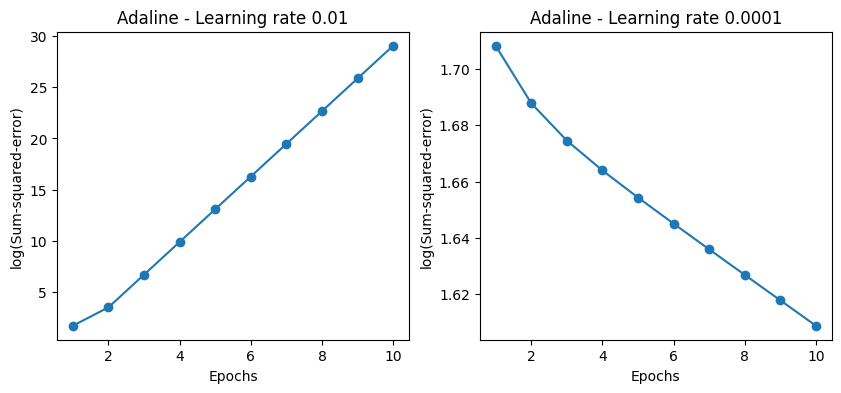

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = Adaline(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada1 = Adaline(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()


## Improving gradient descent through feature scaling

#### A feature scaling method called standardization, which gives our data the properties of a standard normal distribution: zero-mean and unit variance. This normalization procedure helps gradient descent learning to converge more quickly. Standardization shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1

#### to standardize the $j^{th}$ feature, we can simply subtract the sample mean, $\mu_j$ , from every training

### $x'_j=\frac{x_j-\mu_j}{\sigma_j}$

#### One of the reasons why standardization helps with gradient descent learning is that the optimizer has to go through fewer steps to find a good or optimal solution
![featurescale](./featurescale.png)

In [14]:
X_std=np.copy(X)
X_std[:,0]=(X_std[:,0]-X_std[:,0].mean())/X_std[:,0].std()
X_std[:,1]=(X_std[:,1]-X_std[:,1].mean())/X_std[:,1].std()

2
2


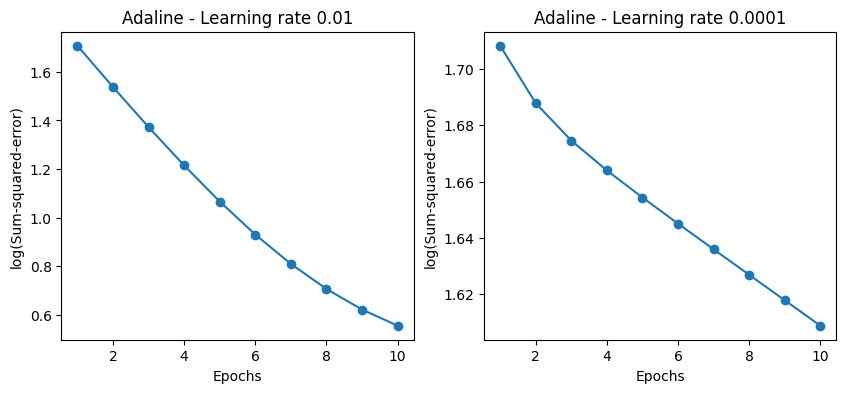

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = Adaline(n_iter=10, eta=0.01).fit(X_std, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada1 = Adaline(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()


## Large-scale machine learning and stochastic gradient descent

#### Instead of updating the weights based on the sum of the accumulated errors over all training examples

### $\Delta w=\eta\sum\limits_i(y^i-\phi(z^i))x^i$

#### we update the weights incrementally for each training example:

### $\Delta w=\eta(y^i-\phi(z^i))x^i$

#### SDG typically reaches convergence much faster because of the more frequent weight updates. Since each gradient is calculated based on a single training example, the error surface is noisier than in gradient descent, which can also have the advantage that SGD can escape shallow local minima more readily if we are working with nonlinear cost functions. 

#### Advantage of SGD is that we can use it for online learning. In online learning, our model is trained on the fly as new training data arrives. This is especially useful if we are accumulating large amounts of data

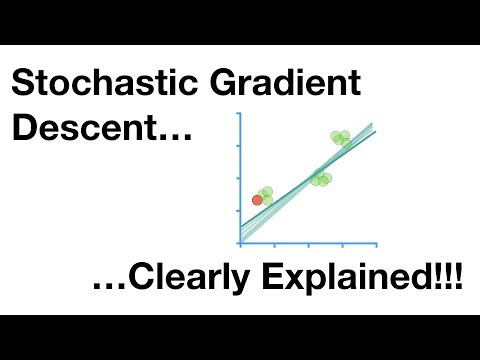

In [43]:
video=YouTubeVideo("vMh0zPT0tLI")

display(video)

## Mini-batch gradient descent

#### A compromise between batch gradient descent and SGD is so-called mini-batch learning. Mini-batch learning can be understood as applying batch gradient descent to smaller subsets of the training data

In [25]:
class AdalineSDG(object):

    def __init__(self,eta=.01,n_iter=10,random_state=None,shuffel=True):

        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
        self.shuffel=shuffel
    
    def fit(self,X,y):

        self.initialize_weights(X.shape[1])
        self.cost_=[]

        for _ in range(self.n_iter):

            if self.shuffel:
                X,y=self._shuffel(X,y)
            cost=[]

            for xi,target in zip(X,y):

                cost.append(self.weight_update(xi,target))
            avg_cost=sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self

    

    def weight_update(self,xi,target):

        output=self.activation(self.net_input(xi))

        error=(target-output)
        print('eror {}'.format(error))

        self.w_[1:]+=self.eta*xi.dot(error)
        self.w_[0]+=self.eta*error
        cost=.5*error**2
        return cost
    
    
    def activation(self,X):
        return X
    
    def net_input(self,X):

        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self,X):

        return np.where(self.activation(self.net_input(X))>=0.0,1,-1)



    def _shuffel(self,X,y):
        r=self.rgen.permutation(len(y))
        return X[r],y[r]
    def initialize_weights(self,m):

        self.rgen=np.random.RandomState(self.random_state)
        self.w_=self.rgen.normal(loc=0.0,scale=0.01,size=1+m)
        self.w_initialized=True


eror 0.9910790833510612
eror -1.025043871585782
eror 0.9657067372169844
eror 0.9498017446228468
eror 0.9398654364289034
eror 0.9325578337005423
eror 0.8887949328594167
eror 0.8187881375369293
eror -0.9687209772056017
eror -0.8924752354427848
eror 0.7270618167948902
eror 0.97755420158539
eror -0.8787845426816259
eror 0.6225654608152514
eror -0.9695882939308325
eror 0.8480746137846309
eror 0.7935299489333641
eror 0.7698543527450445
eror 0.6488400458965871
eror -0.7394877451489678
eror 0.5834923661952539
eror -0.8480975438110955
eror 0.6177324492665562
eror 0.472843845020248
eror 0.7146696995258581
eror -0.914461516205017
eror 0.6669183632020217
eror -0.8615637128559391
eror -0.8091387926010185
eror 0.7457173144172335
eror -0.8561707692094069
eror 0.6041754592156853
eror 0.8193782895467491
eror -0.8421742276873374
eror -0.7743922036215444
eror 0.3536319986729376
eror -0.7282922744771757
eror -0.6559972340101332
eror -0.7251636558669848
eror -0.75934687078676
eror 0.6649779688521053
eror -

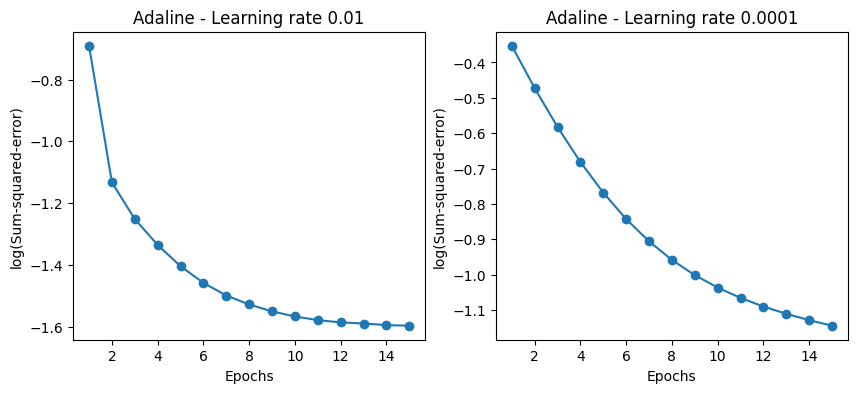

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada=AdalineSDG(.01,15,1)
ada.fit(X_std,y)

ax[0].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')



ada=AdalineSDG(.001,15,1)
ada.fit(X_std,y)

ax[1].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')



plt.show()
